In [1]:
# Import statements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import acf

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Maidstone 5-year

In [2]:
wide_data_incidence = pd.read_csv('wide_incidence.csv',header=[0,1], index_col=0)
wide_data_total = pd.read_csv('wide_total.csv',header=[0,1], index_col=0)
npis = pd.read_csv('ltla_to_nhs.csv')
weekly_counts_total = pd.read_csv('weekly_total.csv')

In [3]:
rolling = wide_data_incidence['Maidstone'].rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec = np.zeros((len(cov.index.get_level_values(0).unique()),19))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total[i] = eigenvalues[dominant_index]
        cov_100_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec[i] = np.array(19*[0])
        cov_100_total[i] = np.nan
        cov_100_var[i] = np.nan


rolling = wide_data_incidence['Maidstone'].rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec = np.zeros((len(cov.index.get_level_values(0).unique()),19))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total[i] = eigenvalues[dominant_index]
        cov_30_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec[i] = np.array(19*[0])
        cov_30_total[i] = np.nan
        cov_30_var[i] = np.nan

In [4]:
rolling = wide_data_total['Maidstone'].rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),19))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total_det[i] = eigenvalues[dominant_index]
        cov_100_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec_det[i] = np.array(19*[0])
        cov_100_total_det[i] = np.nan
        cov_100_var_det[i] = np.nan


rolling = wide_data_total['Maidstone'].rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),19))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total_det[i] = eigenvalues[dominant_index]
        cov_30_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec_det[i] = np.array(19*[0])
        cov_30_total_det[i] = np.nan
        cov_30_var_det[i] = np.nan

/tmp/ipykernel_288394/1737525137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


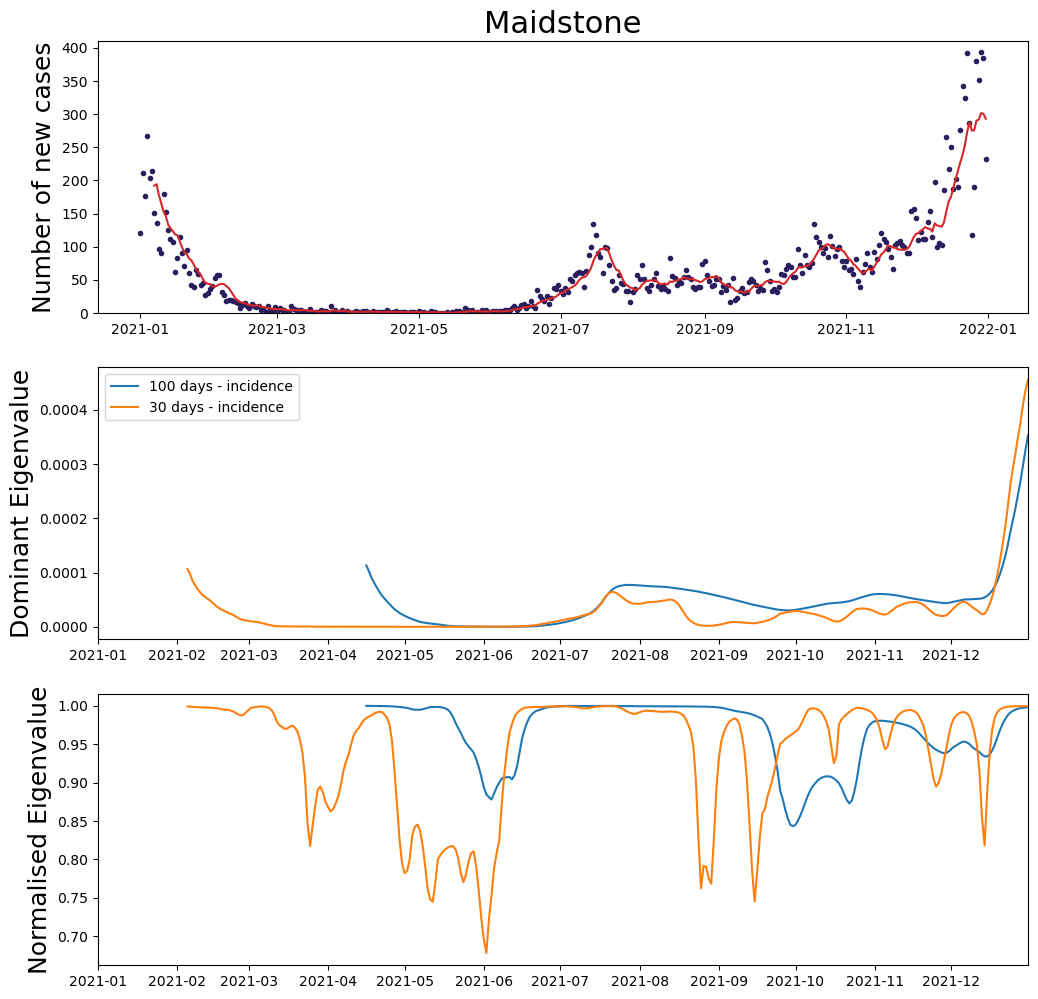

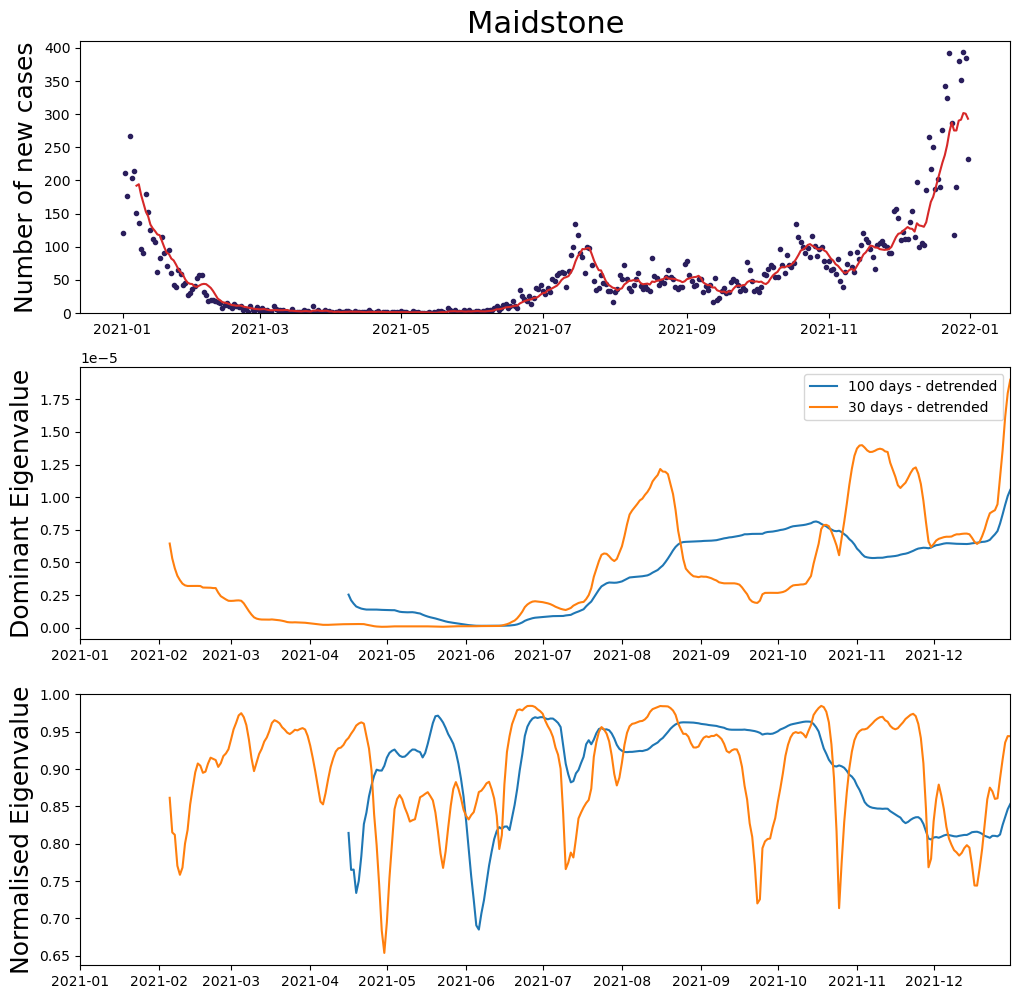

In [5]:
cases_plot = pd.read_csv('cases_total.csv')
cases_plot['date'] = pd.to_datetime(cases_plot['date'])
cases_plot = cases_plot[cases_plot['date'] >= '2021-01-01']
cases_plot.set_index('date',inplace=True)
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0].set_ylim((0,410))
axs[0].set_title('Maidstone',fontsize=22)
axs[0].set_ylabel('Number of new cases',fontsize=18)
axs[1].plot(counts['date'],cov_100_total,label='100 days - incidence')
axs[2].plot(counts['date'],cov_100_var,label='100 days - incidence')
axs[1].plot(counts['date'],cov_30_total,label='30 days - incidence')
axs[2].plot(counts['date'],cov_30_var,label='30 days - incidence')
axs[1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1].legend()
plt.show()
fig, axs = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0].set_ylim((0,410))
axs[0].set_title('Maidstone',fontsize=22)
axs[0].set_ylabel('Number of new cases',fontsize=18)
axs[1].plot(counts['date'],cov_100_total_det,label='100 days - detrended')
axs[2].plot(counts['date'],cov_100_var_det,label='100 days - detrended')
axs[1].plot(counts['date'],cov_30_total_det,label='30 days - detrended')
axs[2].plot(counts['date'],cov_30_var_det,label='30 days - detrended')
axs[1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1].legend()
plt.show()

/tmp/ipykernel_288394/1220671834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


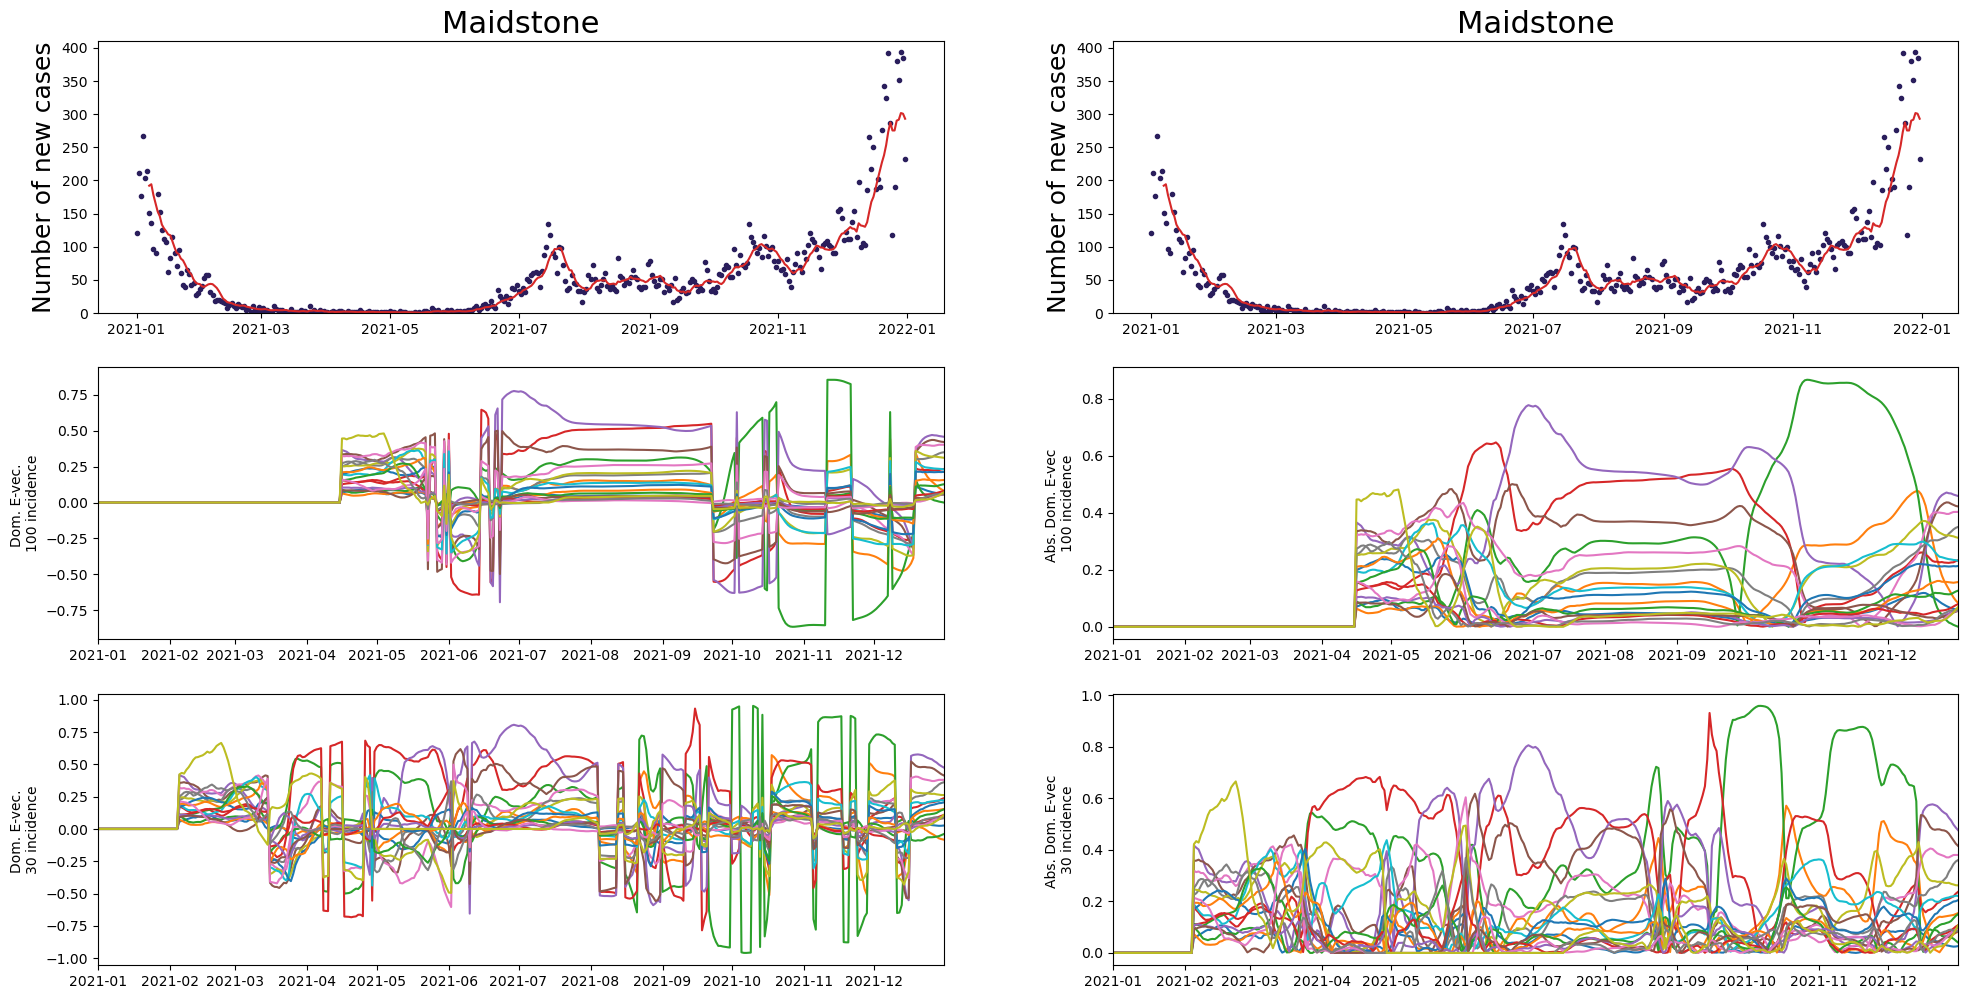

In [6]:
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0,0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,0].set_ylim((0,410))
axs[0,0].set_title('Maidstone',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec[0])):
    axs[1,0].plot(counts['date'],cov_100_evec[:,i])
axs[1,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dom. E-vec. \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[2,0].plot(counts['date'],cov_30_evec[:,i])
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Dom. E-vec. \n30 incidence')

axs[0,1].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,1].set_ylim((0,410))
axs[0,1].set_title('Maidstone',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec[0])):
    axs[1,1].plot(counts['date'],np.abs(cov_100_evec[:,i]))
axs[1,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Abs. Dom. E-vec \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[2,1].plot(counts['date'],np.abs(cov_30_evec[:,i]))
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n30 incidence')
plt.show()

/tmp/ipykernel_288394/3145030932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


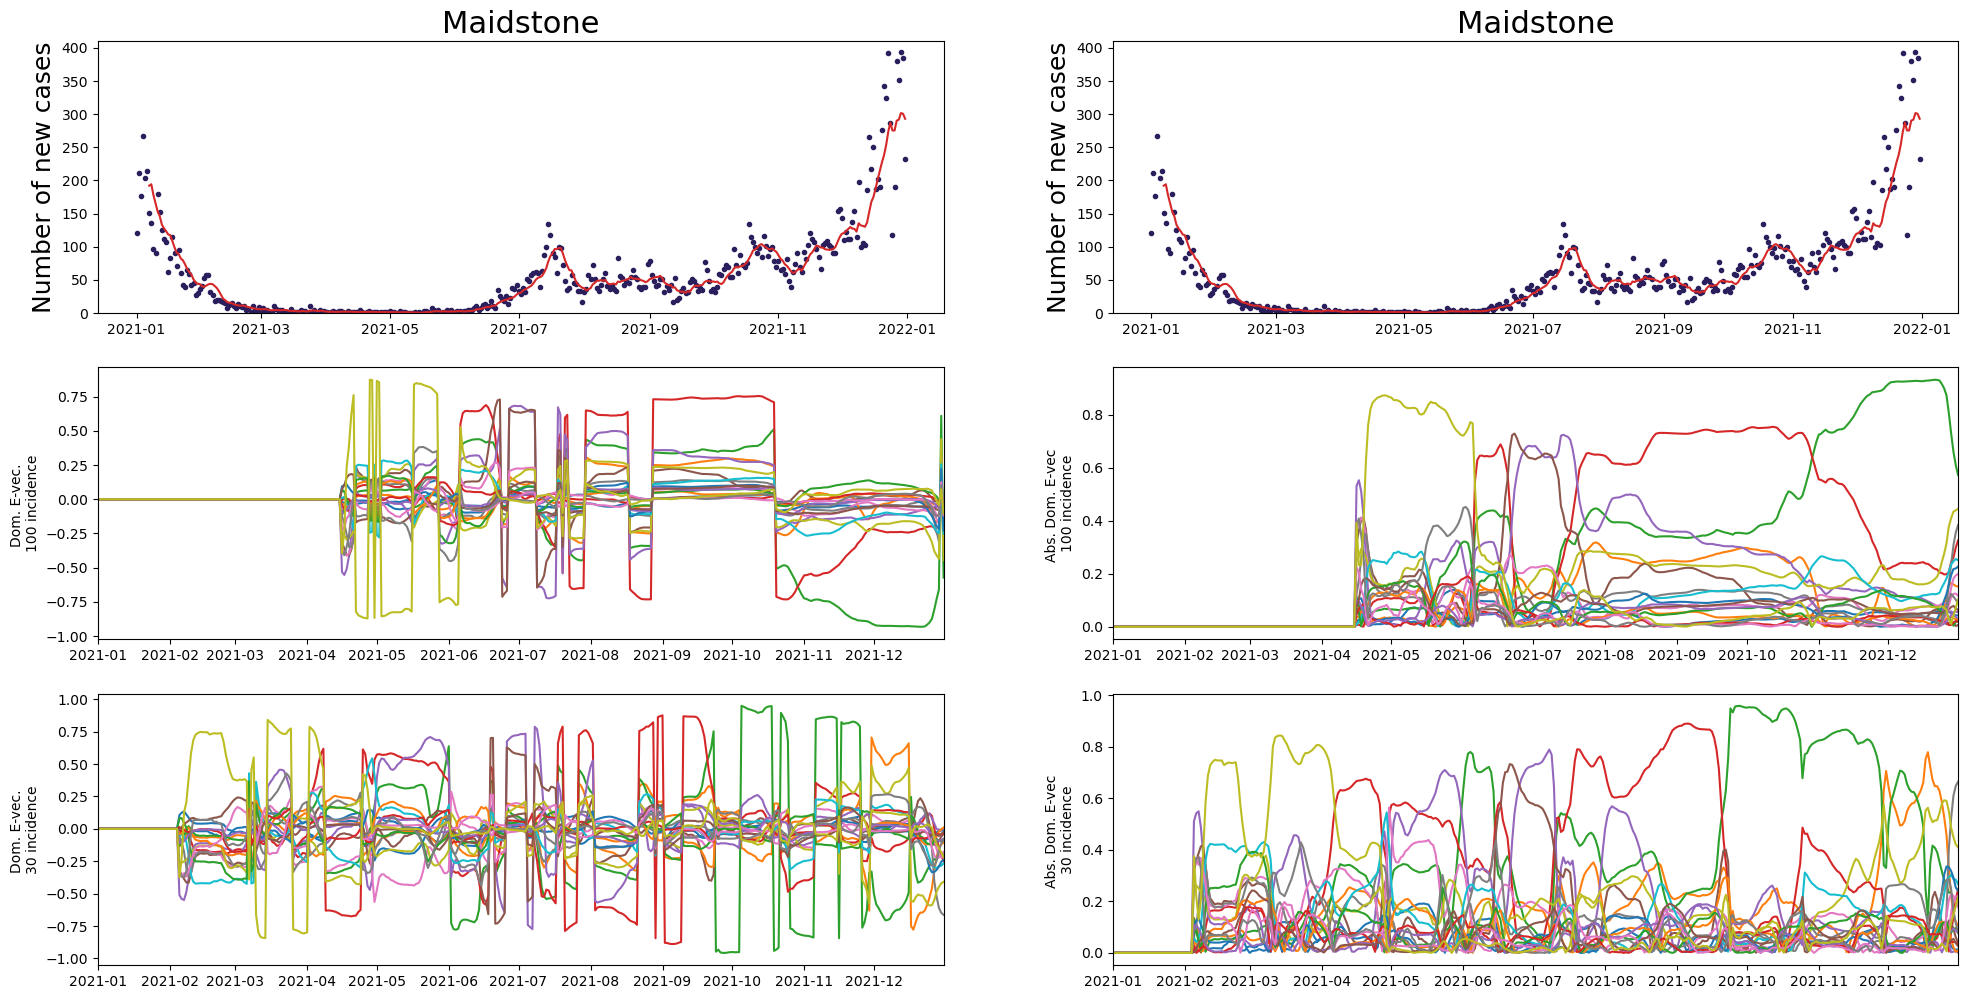

In [7]:
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0,0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,0].set_ylim((0,410))
axs[0,0].set_title('Maidstone',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec_det[0])):
    axs[1,0].plot(counts['date'],cov_100_evec_det[:,i])
axs[1,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dom. E-vec. \n100 incidence')
for i in range(len(cov_30_evec_det[0])):
    axs[2,0].plot(counts['date'],cov_30_evec_det[:,i])
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Dom. E-vec. \n30 incidence')

axs[0,1].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,1].set_ylim((0,410))
axs[0,1].set_title('Maidstone',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec_det[0])):
    axs[1,1].plot(counts['date'],np.abs(cov_100_evec_det[:,i]))
axs[1,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Abs. Dom. E-vec \n100 incidence')
for i in range(len(cov_30_evec_det[0])):
    axs[2,1].plot(counts['date'],np.abs(cov_30_evec_det[:,i]))
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n30 incidence')
plt.show()

## Maidstone 10-year

In [8]:
wide_data_incidence = pd.read_csv('wide_incidence_10year.csv',header=[0,1], index_col=0)
wide_data_total = pd.read_csv('wide_total_10year.csv',header=[0,1], index_col=0)
npis = pd.read_csv('ltla_to_nhs.csv')
weekly_counts_total = pd.read_csv('weekly_total_10year.csv')

In [9]:
rolling = wide_data_incidence['Maidstone'].rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec = np.zeros((len(cov.index.get_level_values(0).unique()),10))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total[i] = eigenvalues[dominant_index]
        cov_100_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec[i] = np.array(10*[0])
        cov_100_total[i] = np.nan
        cov_100_var[i] = np.nan


rolling = wide_data_incidence['Maidstone'].rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec = np.zeros((len(cov.index.get_level_values(0).unique()),10))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total[i] = eigenvalues[dominant_index]
        cov_30_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec[i] = np.array(10*[0])
        cov_30_total[i] = np.nan
        cov_30_var[i] = np.nan

In [10]:
rolling = wide_data_total['Maidstone'].rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),10))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total_det[i] = eigenvalues[dominant_index]
        cov_100_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec_det[i] = np.array(10*[0])
        cov_100_total_det[i] = np.nan
        cov_100_var_det[i] = np.nan


rolling = wide_data_total['Maidstone'].rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var_det = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec_det = np.zeros((len(cov.index.get_level_values(0).unique()),10))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total_det[i] = eigenvalues[dominant_index]
        cov_30_var_det[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec_det[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec_det[i] = np.array(10*[0])
        cov_30_total_det[i] = np.nan
        cov_30_var_det[i] = np.nan

/tmp/ipykernel_288394/4015330915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


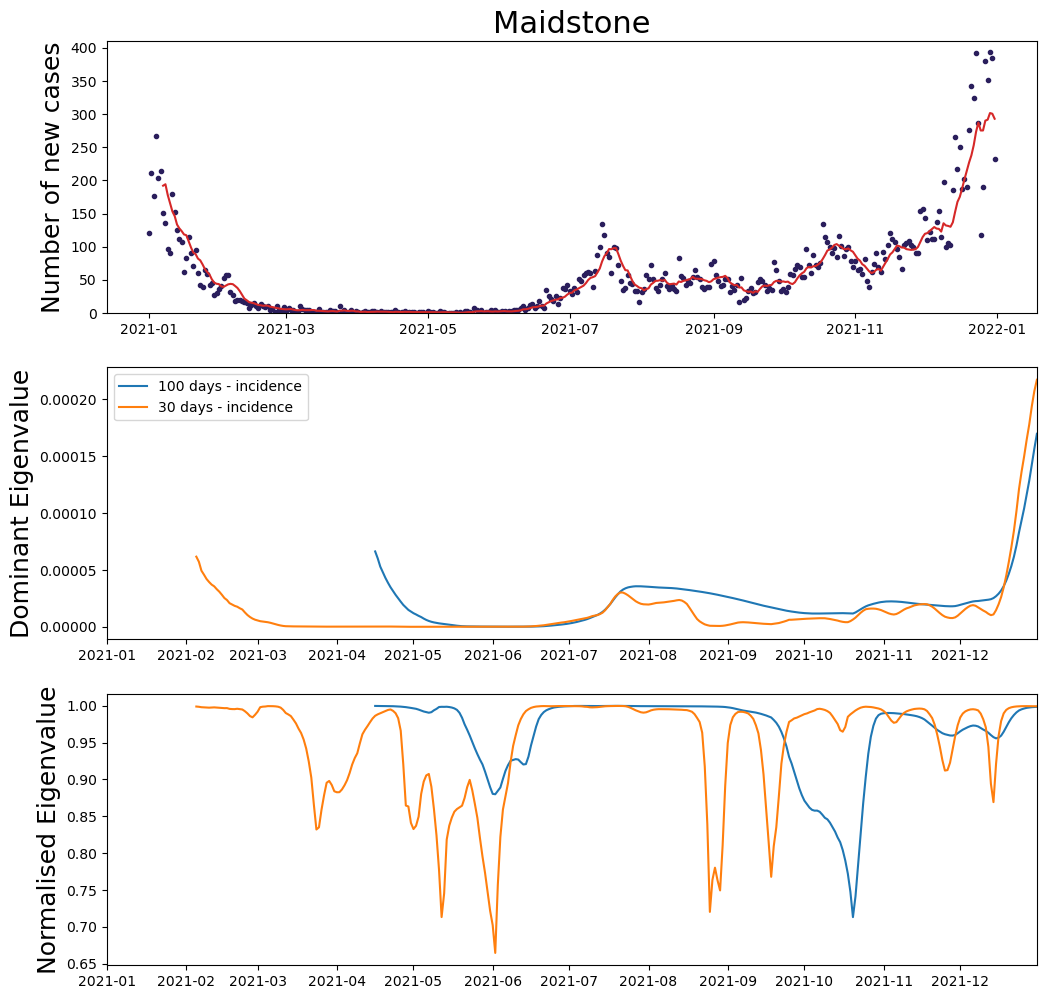

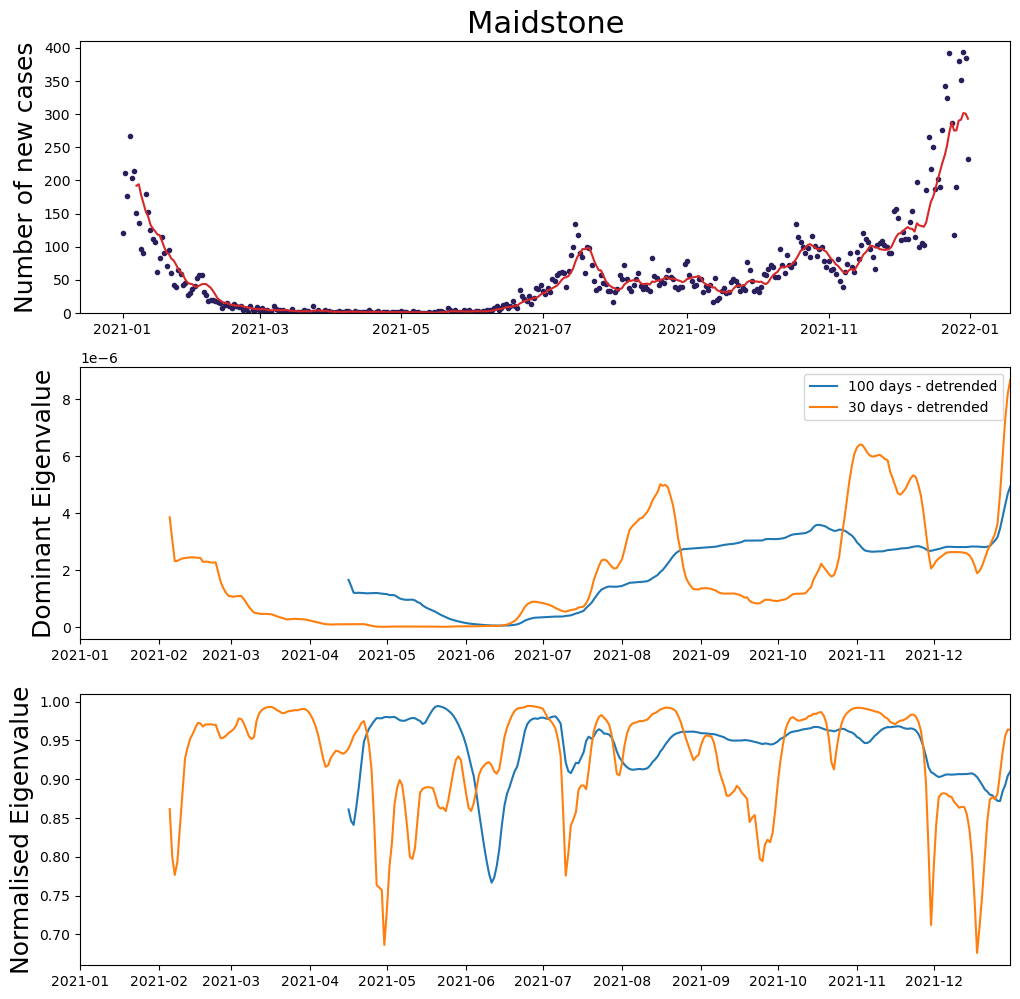

In [11]:
cases_plot = pd.read_csv('cases_total.csv')
cases_plot['date'] = pd.to_datetime(cases_plot['date'])
cases_plot = cases_plot[cases_plot['date'] >= '2021-01-01']
cases_plot.set_index('date',inplace=True)
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0].set_ylim((0,410))
axs[0].set_title('Maidstone',fontsize=22)
axs[0].set_ylabel('Number of new cases',fontsize=18)
axs[1].plot(counts['date'],cov_100_total,label='100 days - incidence')
axs[2].plot(counts['date'],cov_100_var,label='100 days - incidence')
axs[1].plot(counts['date'],cov_30_total,label='30 days - incidence')
axs[2].plot(counts['date'],cov_30_var,label='30 days - incidence')
axs[1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1].legend()
plt.show()

fig, axs = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0].set_ylim((0,410))
axs[0].set_title('Maidstone',fontsize=22)
axs[0].set_ylabel('Number of new cases',fontsize=18)
axs[1].plot(counts['date'],cov_100_total_det,label='100 days - detrended')
axs[2].plot(counts['date'],cov_100_var_det,label='100 days - detrended')
axs[1].plot(counts['date'],cov_30_total_det,label='30 days - detrended')
axs[2].plot(counts['date'],cov_30_var_det,label='30 days - detrended')
axs[1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1].legend()
plt.show()

/tmp/ipykernel_288394/1220671834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


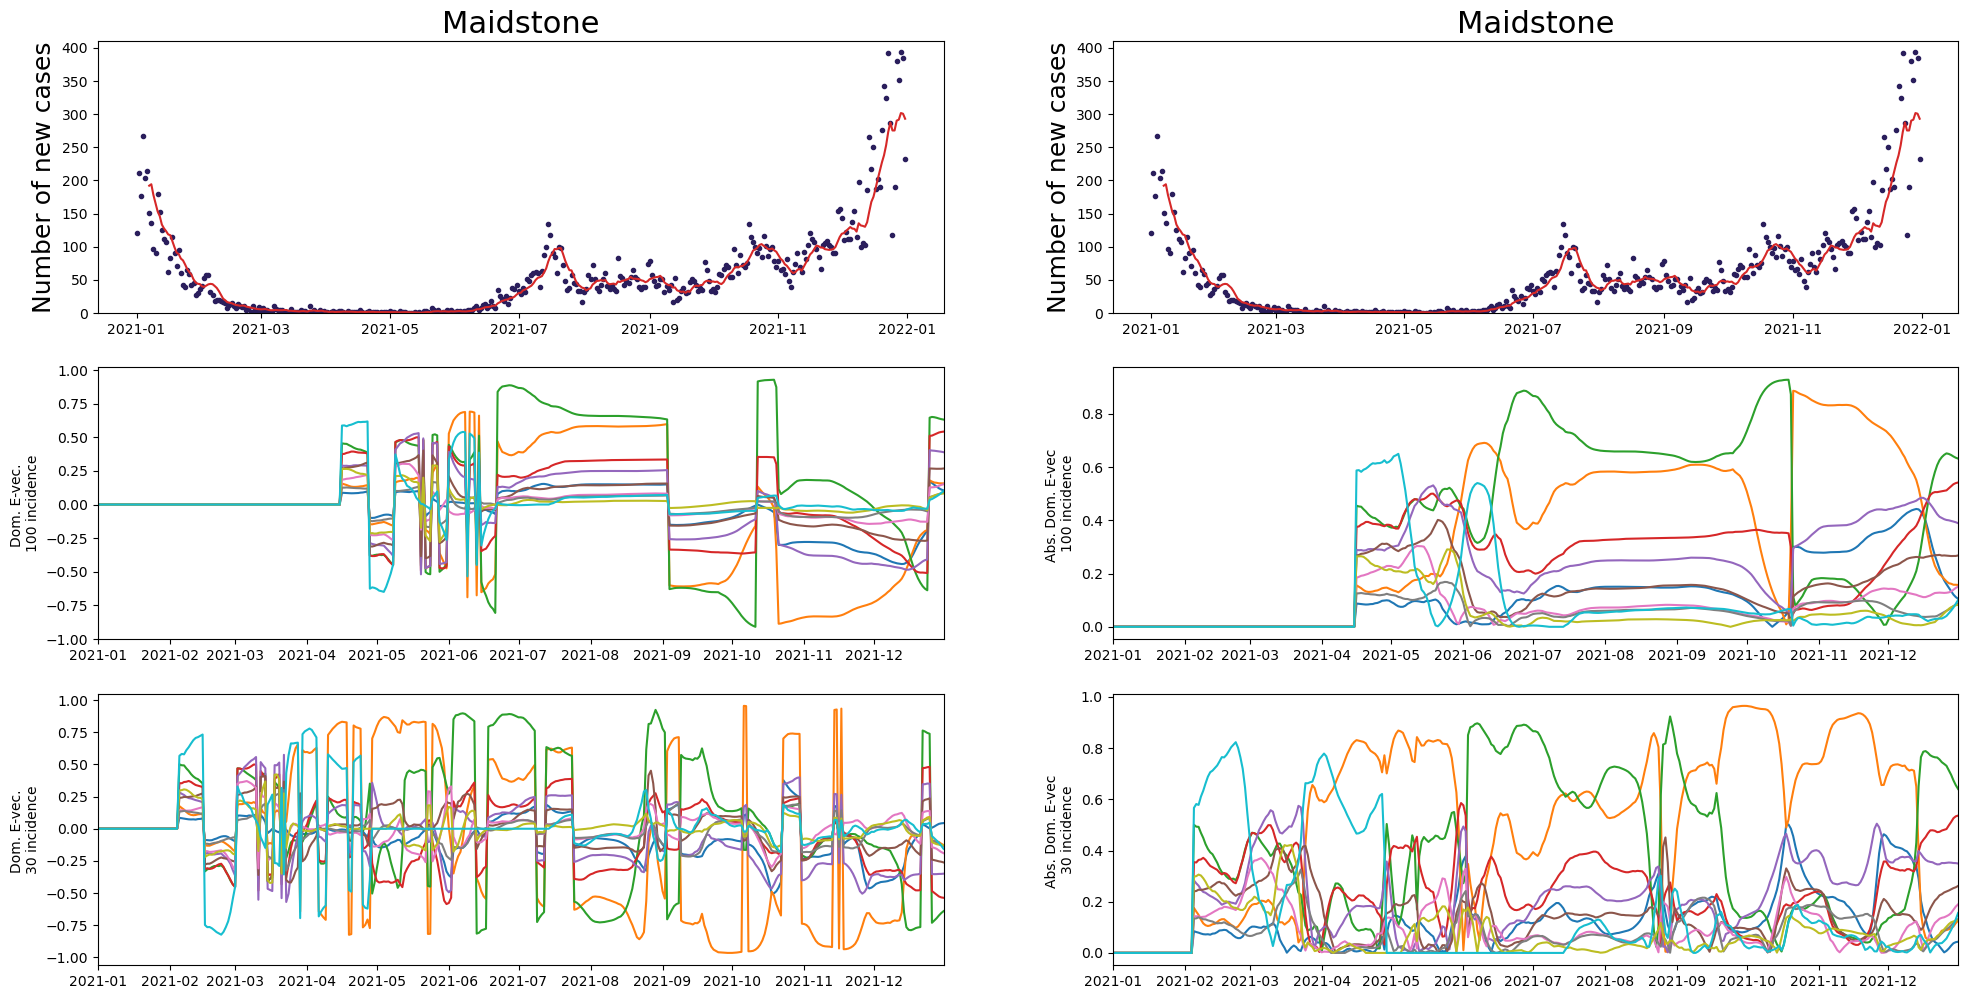

In [12]:
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0,0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,0].set_ylim((0,410))
axs[0,0].set_title('Maidstone',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec[0])):
    axs[1,0].plot(counts['date'],cov_100_evec[:,i])
axs[1,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dom. E-vec. \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[2,0].plot(counts['date'],cov_30_evec[:,i])
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Dom. E-vec. \n30 incidence')

axs[0,1].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,1].set_ylim((0,410))
axs[0,1].set_title('Maidstone',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec[0])):
    axs[1,1].plot(counts['date'],np.abs(cov_100_evec[:,i]))
axs[1,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Abs. Dom. E-vec \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[2,1].plot(counts['date'],np.abs(cov_30_evec[:,i]))
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n30 incidence')
plt.show()

/tmp/ipykernel_288394/3145030932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['rolling'] = counts['value'].rolling(7).mean()


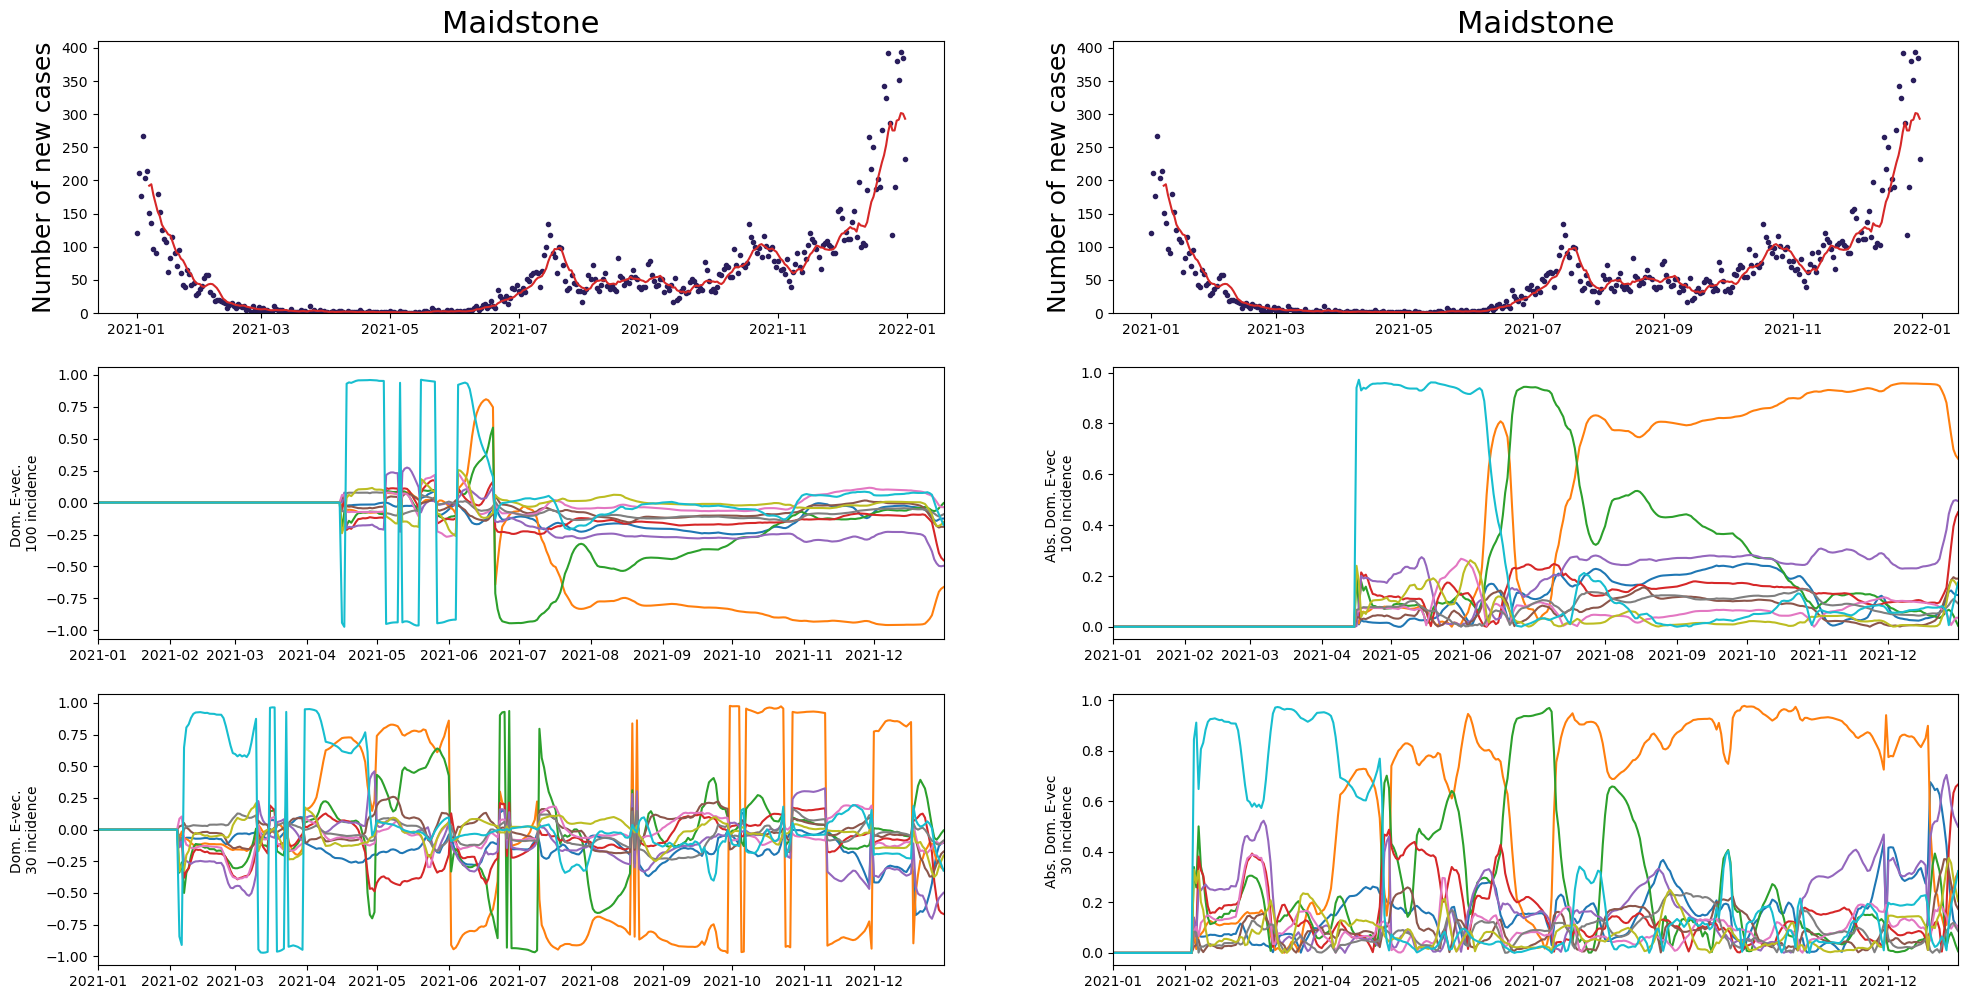

In [13]:
counts = cases_plot[cases_plot['area_name']=='Maidstone']
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts['rolling'] = counts['value'].rolling(7).mean()
counts = counts.reset_index()
axs[0,0].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,0].set_ylim((0,410))
axs[0,0].set_title('Maidstone',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec_det[0])):
    axs[1,0].plot(counts['date'],cov_100_evec_det[:,i])
axs[1,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dom. E-vec. \n100 incidence')
for i in range(len(cov_30_evec_det[0])):
    axs[2,0].plot(counts['date'],cov_30_evec_det[:,i])
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Dom. E-vec. \n30 incidence')

axs[0,1].plot(counts['date'],counts['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts['date'],counts['rolling'],color='#D62828')
axs[0,1].set_ylim((0,410))
axs[0,1].set_title('Maidstone',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec_det[0])):
    axs[1,1].plot(counts['date'],np.abs(cov_100_evec_det[:,i]))
axs[1,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Abs. Dom. E-vec \n100 incidence')
for i in range(len(cov_30_evec_det[0])):
    axs[2,1].plot(counts['date'],np.abs(cov_30_evec_det[:,i]))
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n30 incidence')
plt.show()

## NHS regional

In [14]:
wide_data_incidence_nhs = pd.read_csv('wide_incidence_nhs.csv',index_col=0)
wide_data_total_nhs = pd.read_csv('wide_total_nhs.csv')
weekly_counts_total_nhs = pd.read_csv('weekly_total_nhs.csv')

In [15]:
cases_nhs = (pd.read_csv('newCasesPCROnlyBySpecimenDate_region_2021.csv')).drop(columns=['area_type','metric_name','metric','area_code','area_name'])
cases_nhs['date'] = pd.to_datetime(cases_nhs['date'])
cases_nhs.set_index('date',inplace=True)
cases_nhs = cases_nhs.groupby('date').sum()
cases_nhs['rolling'] = cases_nhs.rolling(7).mean()

In [16]:
rolling = wide_data_incidence_nhs.rolling(window=100,center=False)
cov=rolling.cov()
cov_100_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_100_evec = np.zeros((len(cov.index.get_level_values(0).unique()),9))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_100_total[i] = eigenvalues[dominant_index]
        cov_100_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_100_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_100_evec[i] = np.array(9*[0])
        cov_100_total[i] = np.nan
        cov_100_var[i] = np.nan


rolling = wide_data_incidence_nhs.rolling(window=30,center=False)
cov=rolling.cov()
cov_30_total = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_var = np.zeros(len(cov.index.get_level_values(0).unique()))
cov_30_evec = np.zeros((len(cov.index.get_level_values(0).unique()),9))

for i, date in enumerate(cov.index.get_level_values(0).unique()):
    if not(np.isnan(cov.loc[date].to_numpy()[0,0])):
        eigenvalues, eigenvectors = np.linalg.eigh(cov.loc[date].to_numpy())
        dominant_index = np.argmax(eigenvalues)
        dominant_eigenvalue = eigenvalues[dominant_index]
        dominant_eigenvector = eigenvectors[:, dominant_index]
        cov_30_total[i] = eigenvalues[dominant_index]
        cov_30_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
        cov_30_evec[i, :] = eigenvectors[:, dominant_index].flatten()
    else:
        cov_30_evec[i] = np.array(9*[0])
        cov_30_total[i] = np.nan
        cov_30_var[i] = np.nan

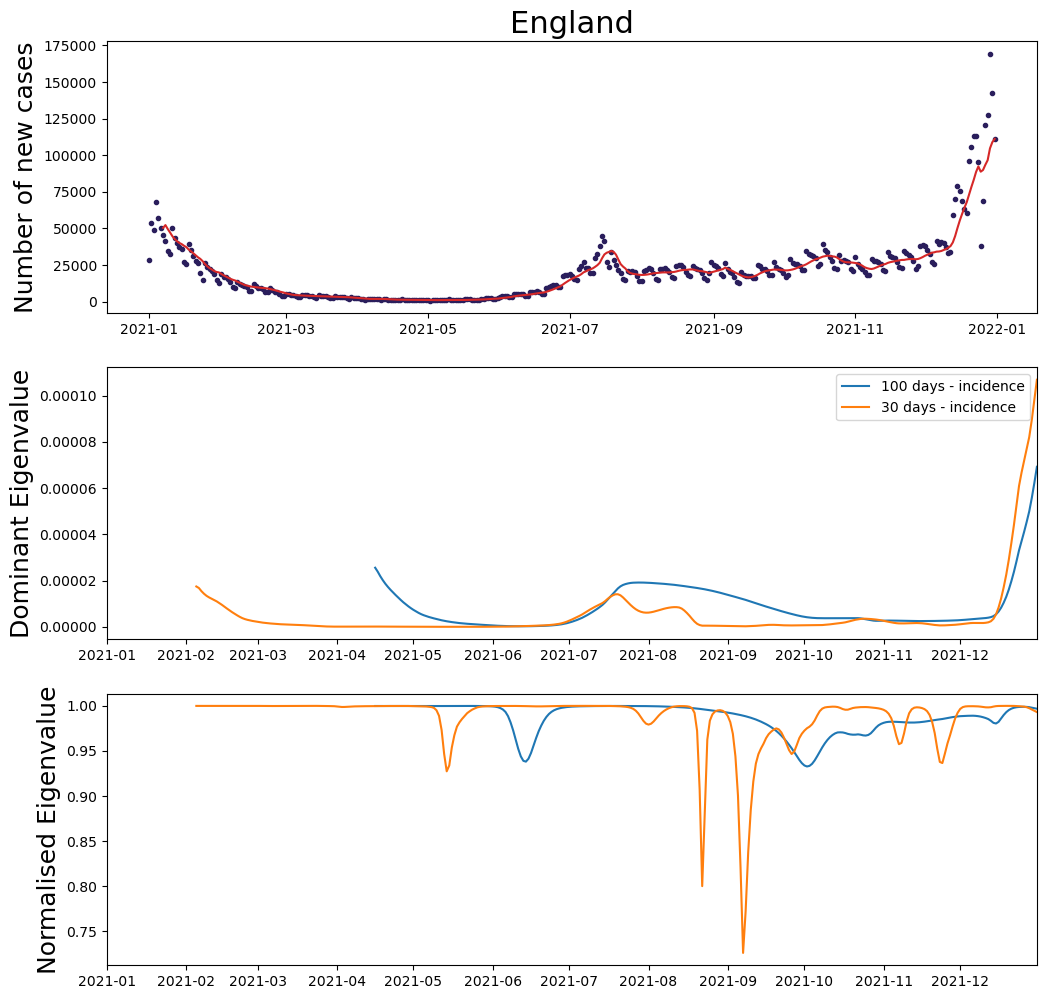

In [17]:
from copy import deepcopy
fig, axs = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
counts_nhs = deepcopy(cases_nhs)
counts_nhs = counts_nhs.reset_index()
axs[0].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0].set_title('England',fontsize=22)
axs[0].set_ylabel('Number of new cases',fontsize=18)
axs[1].plot(counts_nhs['date'],cov_100_total,label='100 days - incidence')
axs[2].plot(counts_nhs['date'],cov_100_var,label='100 days - incidence')
axs[1].plot(counts_nhs['date'],cov_30_total,label='30 days - incidence')
axs[2].plot(counts_nhs['date'],cov_30_var,label='30 days - incidence')
axs[1].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[2].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1].legend()
plt.show()

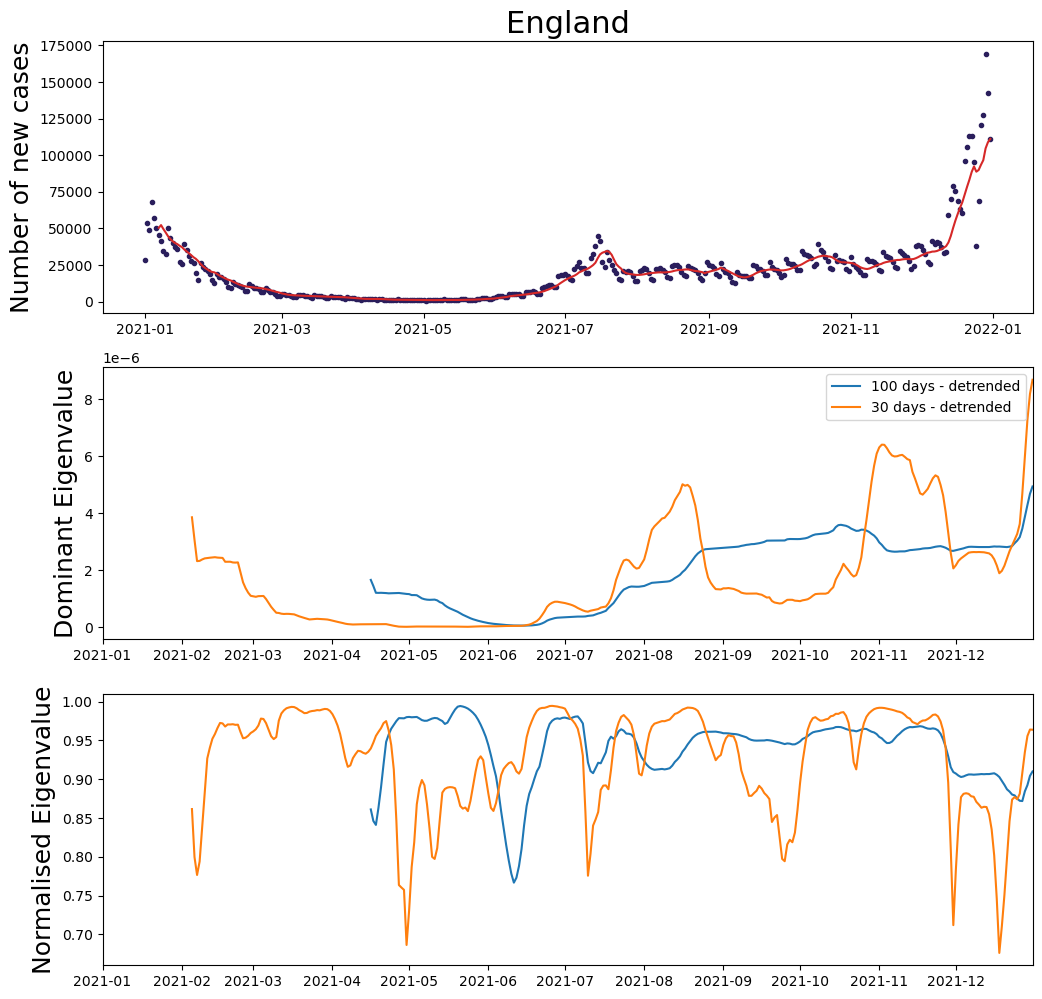

In [18]:
from copy import deepcopy
fig, axs = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
counts_nhs = deepcopy(cases_nhs)
counts_nhs = counts_nhs.reset_index()
axs[0].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0].set_title('England',fontsize=22)
axs[0].set_ylabel('Number of new cases',fontsize=18)
axs[1].plot(counts_nhs['date'],cov_100_total_det,label='100 days - detrended')
axs[2].plot(counts_nhs['date'],cov_100_var_det,label='100 days - detrended')
axs[1].plot(counts_nhs['date'],cov_30_total_det,label='30 days - detrended')
axs[2].plot(counts_nhs['date'],cov_30_var_det,label='30 days - detrended')
axs[1].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[2].set_xlim([counts_nhs['date'].to_numpy()[0],counts_nhs['date'].to_numpy()[-1]])
axs[1].set_ylabel('Dominant Eigenvalue',fontsize=18)
axs[2].set_ylabel('Normalised Eigenvalue', fontsize=18)
axs[1].legend()
plt.show()

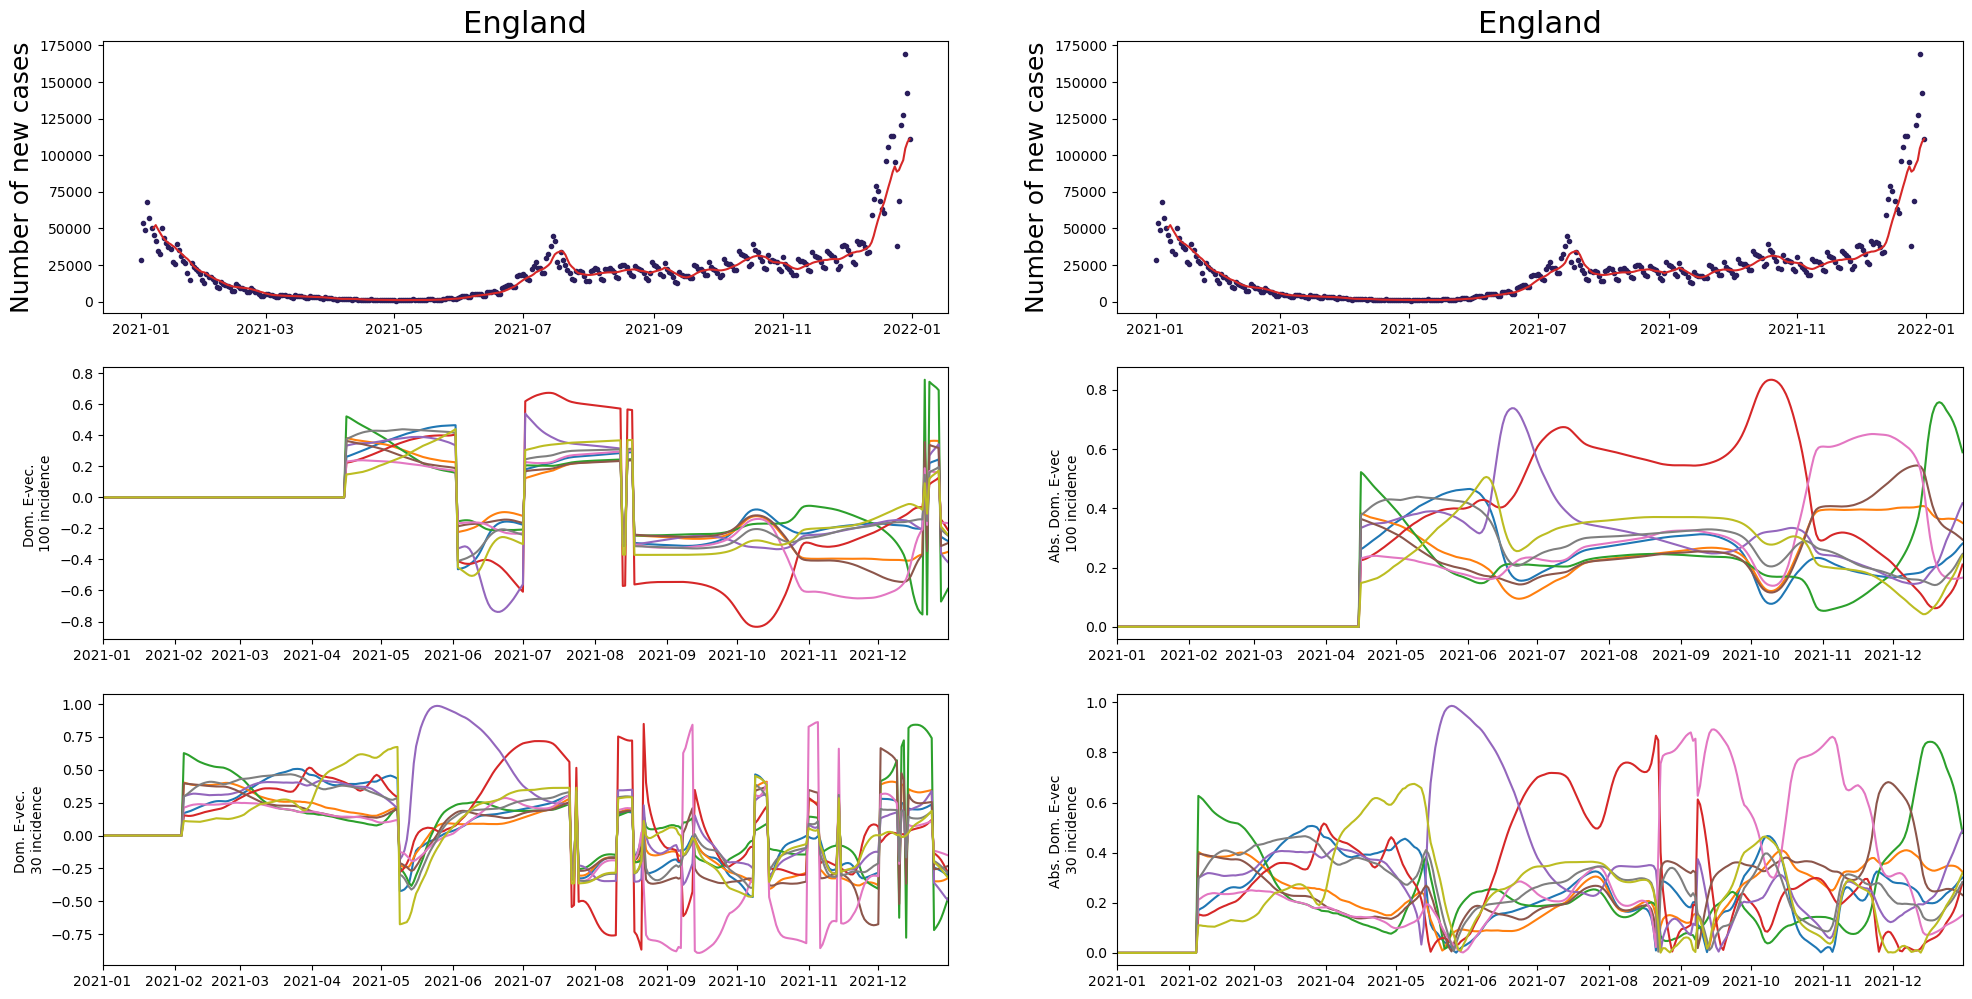

In [19]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts_nhs = deepcopy(cases_nhs)
counts_nhs = counts_nhs.reset_index()
axs[0,0].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0,0].set_title('England',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
axs[0,1].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0,1].set_title('England',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec[0])):
    axs[1,0].plot(counts['date'],cov_100_evec[:,i])
axs[1,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dom. E-vec. \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[2,0].plot(counts['date'],cov_30_evec[:,i])
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Dom. E-vec. \n30 incidence')
for i in range(len(cov_100_evec[0])):
    axs[1,1].plot(counts['date'],np.abs(cov_100_evec[:,i]))
axs[1,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Abs. Dom. E-vec \n100 incidence')
for i in range(len(cov_30_evec[0])):
    axs[2,1].plot(counts['date'],np.abs(cov_30_evec[:,i]))
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n30 incidence')
plt.show()

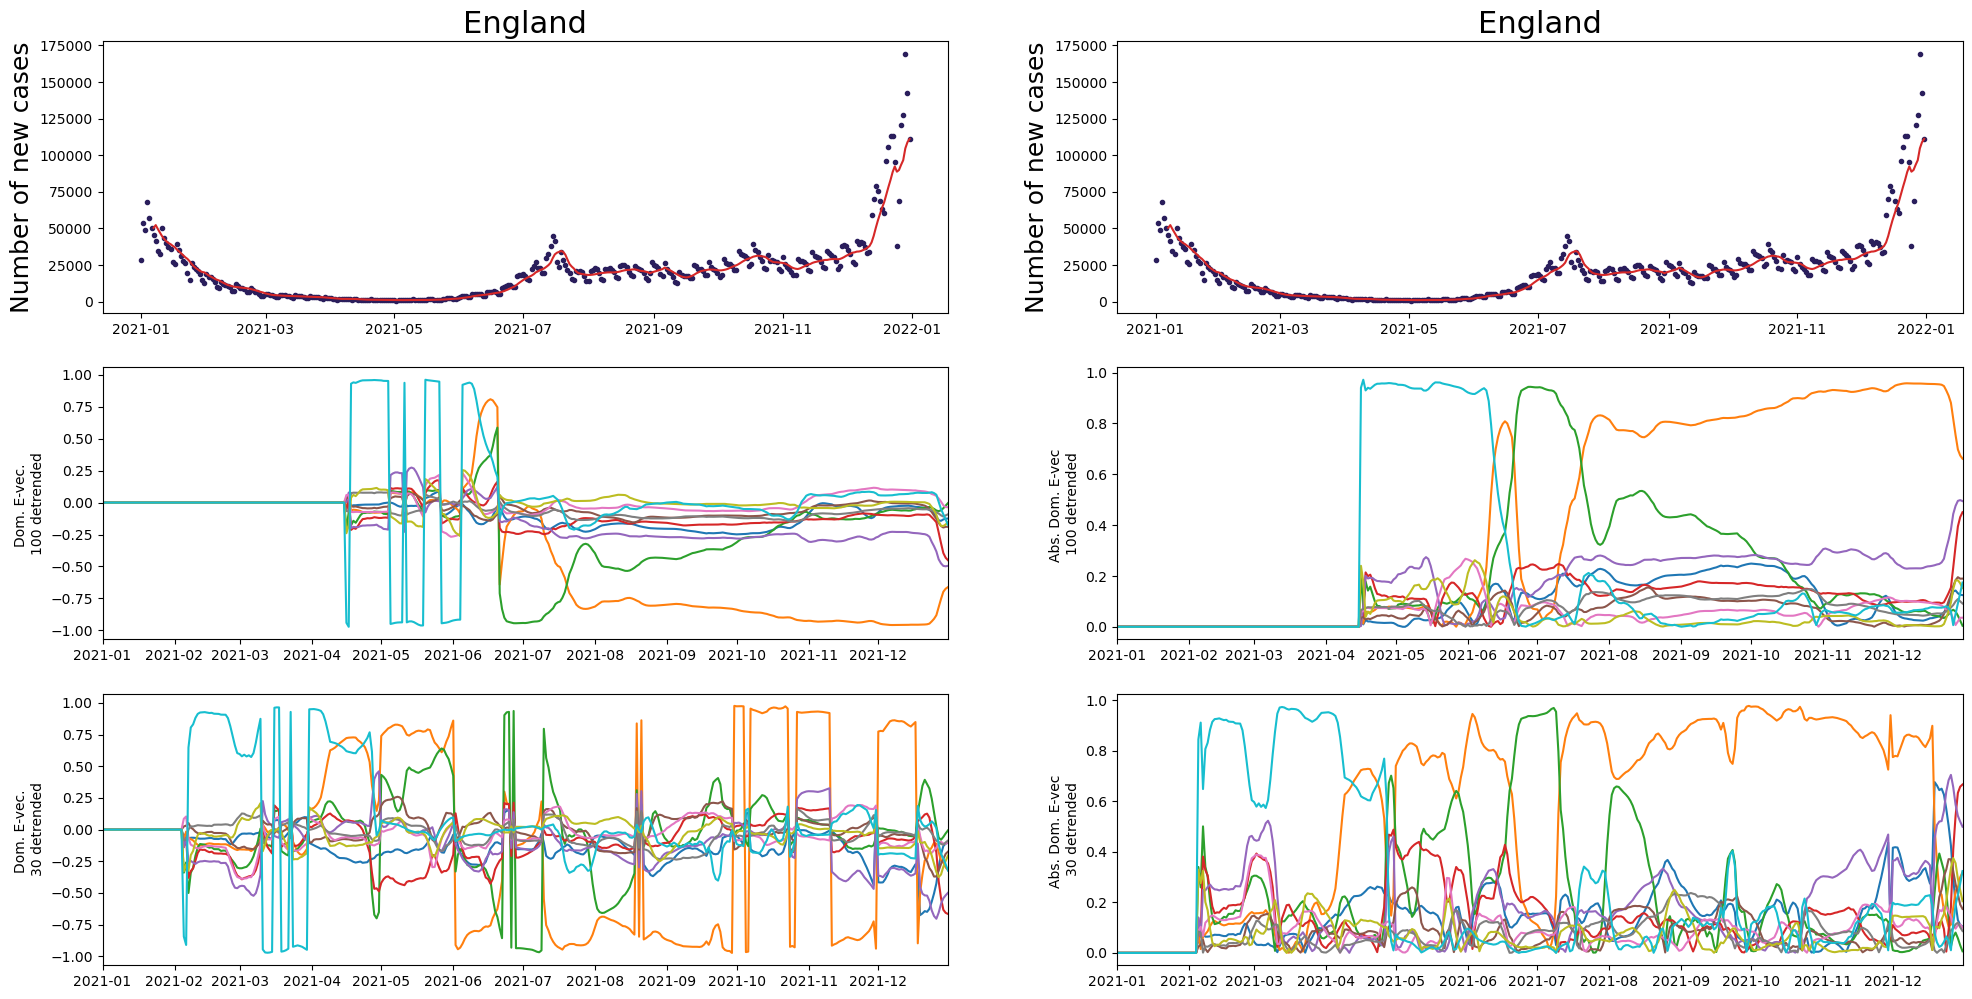

In [20]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(24,12))
counts_nhs = deepcopy(cases_nhs)
counts_nhs = counts_nhs.reset_index()
axs[0,0].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0,0].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0,0].set_title('England',fontsize=22)
axs[0,0].set_ylabel('Number of new cases',fontsize=18)
axs[0,1].plot(counts_nhs['date'],counts_nhs['value'],'.',color='#2A1E5C')
axs[0,1].plot(counts_nhs['date'],counts_nhs['rolling'],color='#D62828')
axs[0,1].set_title('England',fontsize=22)
axs[0,1].set_ylabel('Number of new cases',fontsize=18)
for i in range(len(cov_100_evec_det[0])):
    axs[1,0].plot(counts['date'],cov_100_evec_det[:,i])
axs[1,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,0].set_ylabel('Dom. E-vec. \n100 detrended')
for i in range(len(cov_30_evec_det[0])):
    axs[2,0].plot(counts['date'],cov_30_evec_det[:,i])
axs[2,0].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,0].set_ylabel('Dom. E-vec. \n30 detrended')
for i in range(len(cov_100_evec_det[0])):
    axs[1,1].plot(counts['date'],np.abs(cov_100_evec_det[:,i]))
axs[1,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[1,1].set_ylabel('Abs. Dom. E-vec \n100 detrended')
for i in range(len(cov_30_evec_det[0])):
    axs[2,1].plot(counts['date'],np.abs(cov_30_evec_det[:,i]))
axs[2,1].set_xlim([counts['date'].to_numpy()[0],counts['date'].to_numpy()[-1]])
axs[2,1].set_ylabel('Abs. Dom. E-vec \n30 detrended')
plt.show()